In [1]:
#사용 할 라이브리 임포트하기

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['axes.unicode_minus'] = False


import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


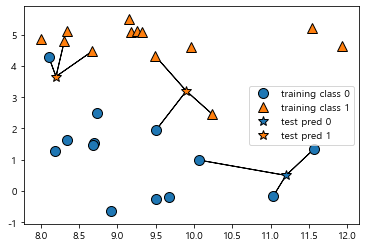

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
# k-NN모델만들기
# k-NN 분류
# 특정 점과 다른 점과의 개수 -> 짝수일 경우 거리로(유클라디언, 맨하튼)
# fit -> 훈련 -> X_train, Y_train
# predict -> 예측 -> (X) -> 예측하기
# score -> (X, y) -> 점수 -> (predict의 평균)

# train_test_split -> 섞고 자르기 -> 테스트용, 훈련용 분류
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# random_state -> shuffle 하는 기준
# 대문자 소문자 구분은?
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
# k-NN 모델 준비
from sklearn.neighbors import KNeighborsClassifier

# n_jobs -> cpu코어사용 개수
# 모델 객체 생성
clf = KNeighborsClassifier(n_neighbors=3, n_jobs=1)

In [16]:
# k-NN 모델 훈련
clf.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
print("테스트 세트 predict의 예상 결과 : {}".format(clf.predict(X_test)))

테스트 세트 predict의 예상 결과 : [1 0 1 0 1 0 0]


In [19]:
print("실제 정답 :{}".format(y_test))

실제 정답 :[1 0 1 0 1 1 0]


In [24]:
print("테스트 세트에 대한 정확도(score) : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트에 대한 정확도(score) : 0.86


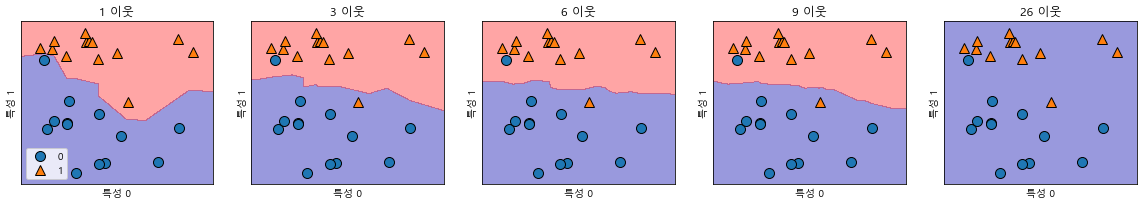

In [25]:
# plt -> 하나의 공간 subplot -> plt를 분할
# 행, 열 -> 1줄에 5개의 그래프 , figsize = 그래프의 크기(괄호 길이, 세로 길이)
fig, axes = plt.subplots(1, 5, figsize=(20,3))

# zip -> 1이웃에 한개의 subplot -> 5개
for n_neighbors, ax in zip([1,3,6,9,26], axes):
    # fit 메서드는 self 반환을 하기 때문에 객체 생성과 메서드를 한줄에 사용 할 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    # 결정 경계를 만들어 내는 함수
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    # 실제 점을 그려주는 함수
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# 범례
axes[0].legend(loc=3)

In [29]:
# 유방암 데이터셋으로 확인하기 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 섞어서 자르기
# stratify -> 데이터가 한쪽으로 편중되지 않도록 해주는 옵션
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, # feature
    cancer.target, # label(정답)
    stratify=cancer.target,
    random_state=66
)

In [30]:
# 훈련, 테스트 점수 기록
# 딥러닝에서 epoch라 표현
training_accuracy = []
test_accuracy = []

# 1 ~ 10까지의 값 
# 근접 개수가 1개부터 10개까지의 값 테스트
n_neighbor_list = range(1, 11)

In [32]:
for n_neighbors in n_neighbor_list:
    # print(n_neighbors)
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 테스트 세트 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

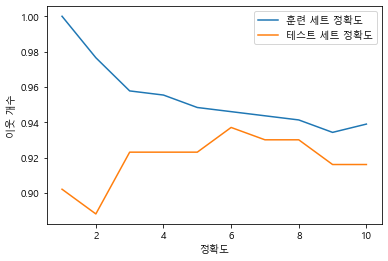

In [33]:
# 점수를 선으로 잇기 위해 plot 그래프 사용
plt.plot(n_neighbor_list, training_accuracy, label="훈련 세트 정확도")
plt.plot(n_neighbor_list, test_accuracy, label="테스트 세트 정확도")
plt.xlabel("정확도")
plt.ylabel("이웃 개수")
plt.legend()
plt.show()


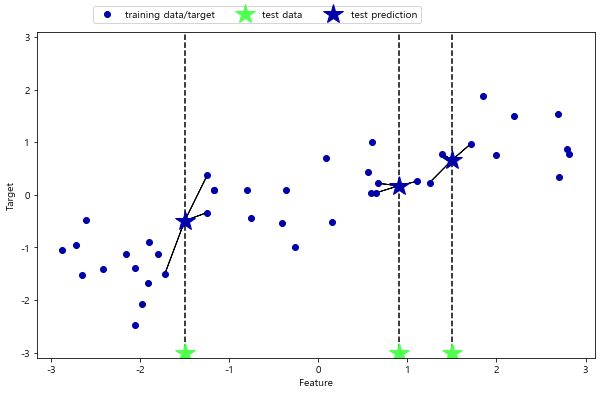

In [35]:
# k-NN 회귀
# 가까운 값들의 평균 -> 실수값
# 가까운 점들으 평균값을 계산하는 것
mglearn.plots.plot_knn_regression(n_neighbors=3)